In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [18]:
raw_data=pd.read_csv("airline_passengers.csv", index_col='Month', parse_dates=True)

In [21]:
raw_data.index.freq="MS"

In [22]:
raw_data.head

<bound method NDFrame.head of             Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121
...                             ...
1960-08-01                      606
1960-09-01                      508
1960-10-01                      461
1960-11-01                      390
1960-12-01                      432

[144 rows x 1 columns]>

In [23]:
raw_data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [74]:
#to find if the data is stationary or not
from statsmodels.tsa.statespace.tools import diff
diff(raw_data['Thousands of Passengers'], k_diff=1)

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Freq: MS, Name: Thousands of Passengers, Length: 143, dtype: float64

In [26]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [37]:
train=raw_data.iloc[:109] #.loc['1949-01-01']
test=raw_data.iloc[108:]

In [50]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
expsm= ExponentialSmoothing(train['Thousands of Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [51]:
test_pred=expsm.forecast(36)

In [52]:
test_pred

1958-02-01    343.825483
1958-03-01    397.003196
1958-04-01    389.012357
1958-05-01    395.677666
1958-06-01    458.689243
1958-07-01    497.082544
1958-08-01    491.628774
1958-09-01    426.132898
1958-10-01    369.967482
1958-11-01    331.053976
1958-12-01    366.283825
1959-01-01    390.150129
1959-02-01    379.135579
1959-03-01    432.313292
1959-04-01    424.322454
1959-05-01    430.987763
1959-06-01    493.999340
1959-07-01    532.392640
1959-08-01    526.938870
1959-09-01    461.442994
1959-10-01    405.277578
1959-11-01    366.364072
1959-12-01    401.593921
1960-01-01    425.460225
1960-02-01    414.445676
1960-03-01    467.623388
1960-04-01    459.632550
1960-05-01    466.297859
1960-06-01    529.309436
1960-07-01    567.702737
1960-08-01    562.248966
1960-09-01    496.753090
1960-10-01    440.587675
1960-11-01    401.674169
1960-12-01    436.904017
1961-01-01    460.770321
Freq: MS, dtype: float64

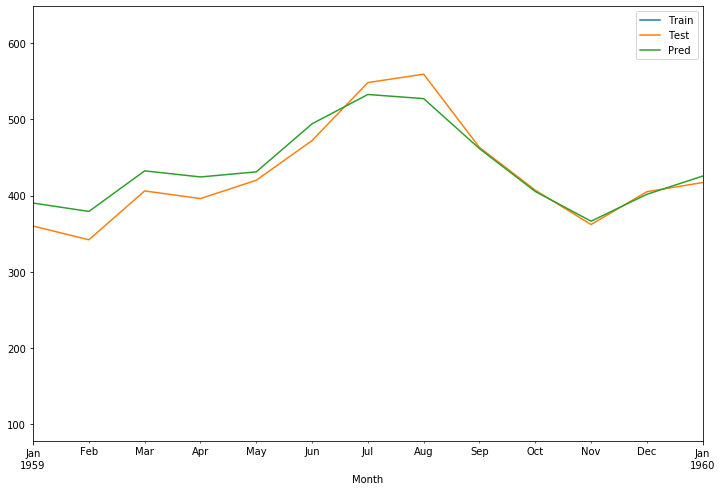

In [54]:
train['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test['Thousands of Passengers'].plot(legend=True, label='Test')
test_pred.plot(legend=True, label='Pred', xlim=['1959-01-01', '1960-01-01'])

In [55]:
#Evaluating the model

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
mean_absolute_error(test, test_pred)

47.969758184957804

In [58]:
mean_squared_error(test, test_pred)

3085.1524282060336

In [59]:
test.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [60]:
np.sqrt(mean_squared_error(test, test_pred))#rmse

55.54414846053573

In [61]:
#rmse is less than the STD which is good

In [66]:
final= ExponentialSmoothing(raw_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()
#doing it on whole dataset

In [67]:
test_pred_final=final.forecast(36)

In [68]:
test_pred_final

1961-01-01    450.683219
1961-02-01    424.827451
1961-03-01    475.513410
1961-04-01    504.074580
1961-05-01    517.878383
1961-06-01    590.158105
1961-07-01    684.233356
1961-08-01    678.039870
1961-09-01    567.114376
1961-10-01    507.822628
1961-11-01    434.724283
1961-12-01    485.988030
1962-01-01    502.757766
1962-02-01    473.914473
1962-03-01    530.456982
1962-04-01    562.318275
1962-05-01    577.717049
1962-06-01    658.348388
1962-07-01    763.293638
1962-08-01    756.384521
1962-09-01    632.642053
1962-10-01    566.499393
1962-11-01    484.954842
1962-12-01    542.141899
1963-01-01    560.849307
1963-02-01    528.673293
1963-03-01    591.749051
1963-04-01    627.291782
1963-05-01    644.469820
1963-06-01    734.417771
1963-07-01    851.489002
1963-08-01    843.781565
1963-09-01    705.741177
1963-10-01    631.956011
1963-11-01    540.989331
1963-12-01    604.784112
Freq: MS, dtype: float64

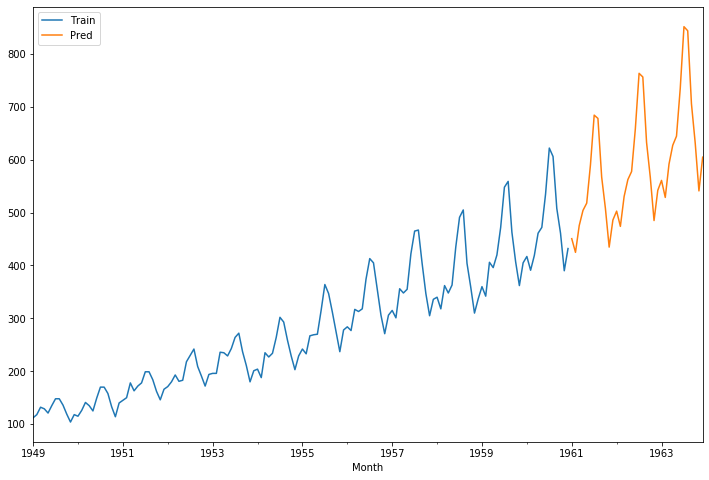

In [72]:
raw_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12,8))
test_pred_final.plot(legend=True, label='Pred')